In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

import plotlib as plib

## Load data

In [2]:
# Load data
ee = 5

pglsDir = '../../scripts/pgls_res/ee{}/'.format(ee)

klist = ['Mammals', 'Birds']

modDict = {k: pd.read_csv(pglsDir + k + '.model_params.tsv', sep='\t')   for k in klist}

datDict = {k: pd.read_csv(pglsDir + k + '.xy_data.tsv', sep='\t')        for k in klist}

configTypes = {'xlog':bool}
configDict = {k: pd.read_csv('../../scripts/pgls_config_file.' + k + '.txt', sep='\t', index_col='x', dtype=configTypes, comment='#') for k in klist}

# Color data
cDat = pd.read_csv('../../data/plot_colors.tsv', sep='\t', index_col='Order')['Color']

# Common names
commonDat = pd.read_csv('../../data/Table_S1.csv', sep=',', index_col='Species')['Common_name']

## Plot mammal longevity and metabolic data

In [3]:
k = 'Mammals'
eList = [ 'Maximum_longevity', 'Gestation', 'Birth_weight', 'Adult_weight', 'PC1', 'PC2', 'MutPerYearUCSC']
(nr, nc) = plib.squarify(len(eList))

eArr = np.array(eList + [''] * (nr*nc - len(eList))).reshape((nr,nc))

Maximum_longevity
Gestation
Birth_weight
Adult_weight
PC1
PC2
MutPerYearUCSC


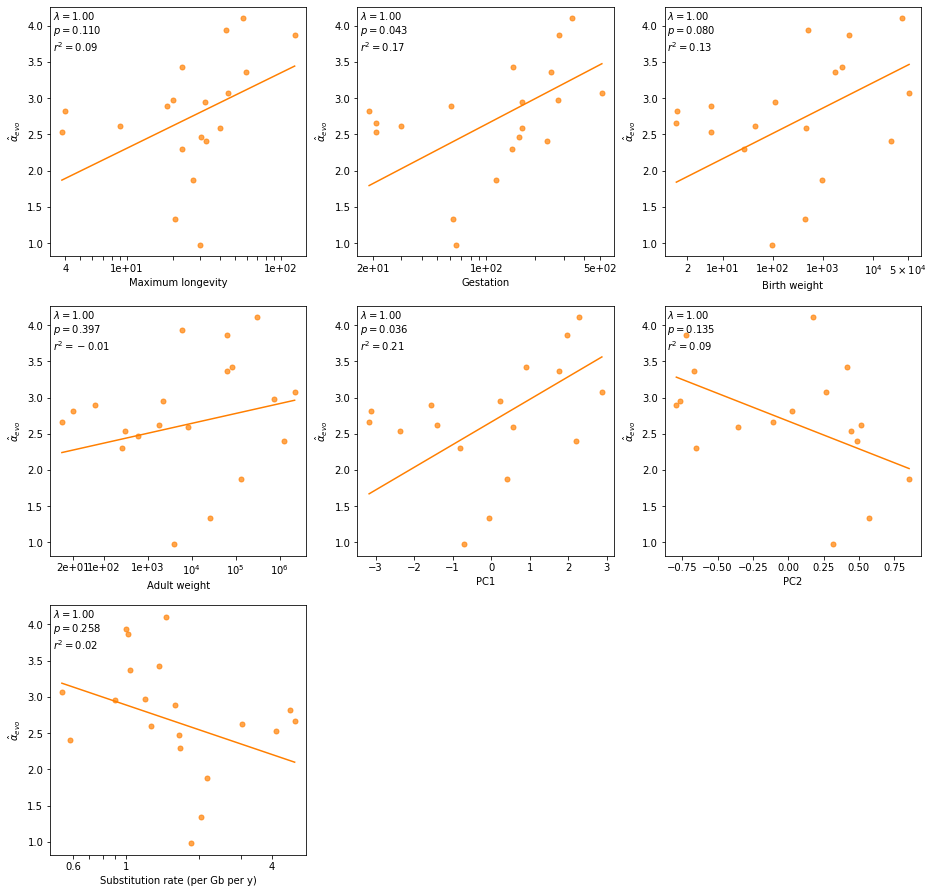

In [4]:
fig, axs = plt.subplots(nrows=nr, ncols=nc, figsize=(5.2*nc, 5.2*nr))
for i in range(nr):
    for j in range(nc):
        e = eArr[i,j]
        if e == '':
            axs[i,j].axis('off')
            continue
        print(e)

        # Iterate over orders

        ptDat = datDict[k].loc[datDict[k]['experiment'] == e + '.Alpha',].copy()
        ptDat['xvar']
        xmin, xmax = min(ptDat.xvar) , max(ptDat.xvar)

        lnDat = modDict[k].loc[modDict[k]['experiment'] == e + '.Alpha',].squeeze()
        c = cDat[k]

        # Plot regression line
        plib.plot_line(lnDat.pgls_ml_intercept, lnDat.pgls_ml_slope, 
                       xmin = xmin, xmax = xmax, c = c, ax = axs[i,j])

        # Plot scatter
        axs[i,j].scatter('xvar', 'yvar', data=ptDat, c=c, s=25, edgecolors=c, alpha=0.7)

        # Legend text
        lab = plib.make_pgls_legend(lnDat.ml_lambda, lnDat.pgls_ml_pval, lnDat.pgls_ml_rsq)
        axs[i,j].annotate(lab, xy=(0.01, 0.99), xycoords='axes fraction', verticalalignment='top')

        # Make log axis if needed
        if (e[0:2] != 'PC') and (configDict[k].loc[e, 'xlog']):
            xticks, xmaj = plib.make_log_xticks(xmin, xmax)
            xlab = plib.make_xtick_lab(xticks, xmaj)
            
            axs[i,j].set_xticks(np.log10(xticks))
            axs[i,j].set_xticklabels(xlab)
        
        if e == 'MutPerYearUCSC':
            axs[i,j].set_xlabel("Substitution rate (per Gb per y)")
        else:
            axs[i,j].set_xlabel(e.replace('_', ' '))
            
        axs[i,j].set_ylabel(r'$\hat{\alpha}_{evo}$')

plt.show(fig)
fig.savefig('../pdfs/Figure_SX_PGLS_traits.pdf')
